In [1]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf # 1.XX version 을 사용 
tf.disable_v2_behavior() # 2.xx version 기능을 사용하지 않겠음
import seaborn as sns
from tensorflow.examples.tutorials.mnist import mnist

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [4]:
xtrain.shape
ytrain.shape

(60000,)

In [5]:
# 훈련샛 검증셋 분리
xval = xtrain[50000:]
yval = ytrain[50000:]
xtrain = xtrain[:50000]
ytrain = ytrain[:50000]

In [6]:
xtrain=xtrain.reshape(50000,784).astype('float32')/255.0
xval=xval.reshape(10000,784).astype('float32')/255.0
xtest=xtest.reshape(10000,784).astype('float32')/255.0

0

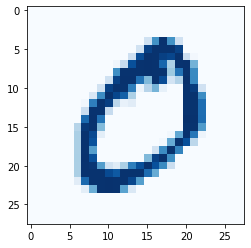

In [7]:
plt.imshow(xtrain[1].reshape(28, 28), plt.cm.Blues)
ytrain[1]

In [8]:
np.random.choice(5,3)

array([2, 2, 0])

In [9]:
trainRandIdx = np.random.choice(50000, 700)
valRandIdx = np.random.choice(10000, 300)

In [10]:
xtrain = xtrain[trainRandIdx]
ytrain = ytrain[trainRandIdx]
xval= xval[valRandIdx]
yval= yval[valRandIdx]

# 케라스 코딩

1)데이터 셋 생성(훈련/ 검증/ 시험 생성)   
2) 모델구성 (Sequential(간단한 모델), 함수 API(복잡한 모델))   
3) 모델 학습 과정 설정(cost함수, 옵티마이저 정의) - compile함    
4) 모델 락습시키기 (train data) = fit 함수  
5) 학습과정 확인(훈련셋/ 검증셋 cost, 정확도 측정) -> 모델  
6) 모델 평가(test data) - evalute 함수  
7) 모델 사용  - predict 함수  

참고 콜백 함수: 어떤 상태가 되었을 때, 사전에 지정한 함수가 호출됨
ex) 와이파이 켬 -> 이동 -> 와이파이 검색 되었을 때, 사전에 지정한 함수가 도출됨
사전에 지정한 함수가 호출 됨 -> 화면에 와이파이가 검색되었습니다.가 나옴

콜백함수 : 모델을 학습하다가 더 이상 좋아지지 않으면 (상태) 모델링 중단하도록 함


In [11]:
yval.shape

(300,)

In [12]:
ytrain = np_utils.to_categorical(ytrain)
yval = np_utils.to_categorical(yval)
ytest = np_utils.to_categorical(ytest)


In [25]:
yval.shape

(300, 10)

In [13]:
data = [2,3,9,0,1]
np_utils.to_categorical(data)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
# 2. 모델 구성하기  입력계층, 히든 계층 출력 계층
model = Sequential()
model.add(Dense(units =2, input_dim = 28*28, activation= 'relu')) #래이어 설계, 입력데이터의 차원
# 입력 =784, 출력=2인 레이어 추가 

model.add(Dense(units =10, activation= 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:
# 3번 모델 학습과정 설정 
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy']) # loss == cost


In [22]:
# 모델 학습시키기

hist = model.fit(xtrain, ytrain, batch_size=10,  epochs=1000, validation_data=(xval, yval))
# hist.history()


Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 114us/sample - loss: 2.2788 - acc: 0.1314 - val_loss: 2.2667 - val_acc: 0.1333
Epoch 2/1000
700/700 [==============================] - 0s 84us/sample - loss: 2.2336 - acc: 0.1757 - val_loss: 2.2282 - val_acc: 0.1567
Epoch 3/1000
700/700 [==============================] - 0s 87us/sample - loss: 2.1948 - acc: 0.2114 - val_loss: 2.1926 - val_acc: 0.1967
Epoch 4/1000
700/700 [==============================] - 0s 84us/sample - loss: 2.1396 - acc: 0.2286 - val_loss: 2.1217 - val_acc: 0.2133
Epoch 5/1000
700/700 [==============================] - 0s 88us/sample - loss: 2.0777 - acc: 0.2729 - val_loss: 2.0619 - val_acc: 0.3133
Epoch 6/1000
700/700 [==============================] - 0s 87us/sample - loss: 2.0271 - acc: 0.3257 - val_loss: 2.0143 - val_acc: 0.3367
Epoch 7/1000
700/700 [==============================] - 0s 88us/sample - loss: 1.9834 - acc: 0.3386 - val_loss: 1.9765 - val_acc: 0

In [35]:
hist = model.fit(xtrain, ytrain, batch_size=10,  epochs=1000, validation_data=(xval, yval))

hist.history['loss']


Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 94us/sample - loss: 0.2095 - acc: 0.9543 - val_loss: 5.5982 - val_acc: 0.4133
Epoch 2/1000
700/700 [==============================] - 0s 115us/sample - loss: 0.2097 - acc: 0.9543 - val_loss: 5.5692 - val_acc: 0.4133
Epoch 3/1000
700/700 [==============================] - 0s 77us/sample - loss: 0.2099 - acc: 0.9586 - val_loss: 5.5768 - val_acc: 0.4133
Epoch 4/1000
700/700 [==============================] - 0s 77us/sample - loss: 0.2099 - acc: 0.9571 - val_loss: 5.5863 - val_acc: 0.4133
Epoch 5/1000
700/700 [==============================] - 0s 80us/sample - loss: 0.2097 - acc: 0.9557 - val_loss: 5.5798 - val_acc: 0.4100
Epoch 6/1000
700/700 [==============================] - 0s 76us/sample - loss: 0.2095 - acc: 0.9557 - val_loss: 5.5738 - val_acc: 0.4067
Epoch 7/1000
700/700 [==============================] - 0s 90us/sample - loss: 0.2093 - acc: 0.9529 - val_loss: 5.6075 - val_acc: 0

[0.20953827883516038,
 0.20974751359650068,
 0.20988616387226752,
 0.2098862015775272,
 0.2096648889194642,
 0.20947348667042595,
 0.20928910640733583,
 0.2095818084797689,
 0.20974011681973934,
 0.2095817204830902,
 0.209705385964896,
 0.20919602241899285,
 0.20963052404778346,
 0.20937177639986787,
 0.20932099052837916,
 0.20910887845924922,
 0.20942247941025666,
 0.20912160210843597,
 0.20902903521699565,
 0.2090635592916182,
 0.20899390796465533,
 0.20918846138353858,
 0.20907475650310517,
 0.20877539116357055,
 0.20896003948790687,
 0.20913171523383686,
 0.2089643342686551,
 0.20873394821371352,
 0.20879491471818515,
 0.20866189157324178,
 0.20904108895254986,
 0.2085856718676431,
 0.20887737753135818,
 0.2090086149850062,
 0.20850151958210128,
 0.20890640911779235,
 0.2084608379751444,
 0.20897047940109456,
 0.2088641729738031,
 0.20875029768794776,
 0.20814772940107754,
 0.20865202945257935,
 0.20838958386863982,
 0.20878962581711155,
 0.2083591709711722,
 0.20832092541136912,
 

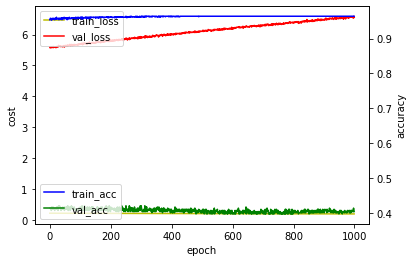

In [37]:
fig, axes = plt.subplots()
accax = axes.twinx() # 윈도우 하나에 여러개 그릴 수 있음
axes.plot(hist.history['loss'], 'y', label = 'train_loss')
axes.plot(hist.history['val_loss'], 'r', label = 'val_loss')
accax.plot(hist.history['acc'], 'b', label = 'train_acc')
accax.plot(hist.history['val_acc'], 'g', label = 'val_acc')

axes.set_xlabel('epoch')
axes.set_ylabel('cost')
accax.set_ylabel('accuracy')
axes.legend(loc = 'upper left')
accax.legend(loc = 'lower left')



# 데이터 생성

In [38]:

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain=xtrain.reshape(60000,784).astype('float32')/255.0
# xval=xval.reshape(10000,784).astype('float32')/255.0
xtest=xtest.reshape(10000,784).astype('float32')/255.0
ytrain = np_utils.to_categorical(ytrain)
# yval = np_utils.to_categorical(yval)
ytest = np_utils.to_categorical(ytest)


# 2. 모델 구성하기  입력계층, 히든 계층 출력 계층

In [39]:

model = Sequential()
model.add(Dense(units =2, input_dim = 28*28, activation= 'relu')) #래이어 설계, 입력데이터의 차원
# 입력 =784, 출력=2인 레이어 추가 

model.add(Dense(units =10, activation= 'softmax'))

# 3. 모델 학습과정 설정, 학습

In [41]:
# 3번 모델 학습과정 설정 
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy']) # loss == cost
hist = model.fit(xtrain, ytrain, batch_size=32,  epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.1895 - acc: 0.5826
Epoch 2/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.1631 - acc: 0.5903
Epoch 3/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.1426 - acc: 0.5942
Epoch 4/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.1259 - acc: 0.5994
Epoch 5/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.1125 - acc: 0.6023
Epoch 6/50
60000/60000 [==============================] - 1s 19us/sample - loss: 1.1010 - acc: 0.6053
Epoch 7/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.0903 - acc: 0.6072
Epoch 8/50
60000/60000 [==============================] - 1s 21us/sample - loss: 1.0822 - acc: 0.6101
Epoch 9/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.0745 - acc: 0.6140
Epoch 10/50
60000/60000 [==============================] - 

# 모델 평가하기

In [43]:
model.evaluate(xtest, ytest, batch_size= 32)

[0.9857413740158081, 0.6708]

# 모델 사용하기 (분류)

In [55]:
yhat = model.predict(xtest[0:1])
yhat # yhat을 모두 더하면, 1이 나옴 왜냐? 확률이기 때문에!
# ytest[0:1]
yhat[0]
np.sum(yhat[0])
np.max(yhat[0])
np.argmax(yhat[0])

7